![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, ©  Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

Answer directly in your copy of the exercise and submit it as a moodle task.

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline


|Variable | Description| Values| |-------------------------------| | survival| Survival| (0 = No; 1 = Yes)| |Pclass |Name | | |Sex |Sex | male, female| |Age |Age| |SibSp |Number of Siblings/Spouses Aboard|| |Parch |Number of Parents/Children Aboard|| |Ticket|Ticket Number|| |Fare |Passenger Fare|| |Cabin |Cabin|| |Embarked |Port of Embarkation| (C = Cherbourg; Q = Queenstown; S = Southampton)|

The definitions used for SibSp and Parch are:
*   Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

*   Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

*   Parent: Mother or Father of Passenger Aboard Titanic
*   Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

# Reading Data

Assign the variable *df* a Dataframe with the Titanic Dataset from the URL https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"

Print *df*.

In [ ]:
#Las urls apuntando a mi repositorio de Github donde tengo los mismos datasets subidos
url_test_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/test.csv'
url_train_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/train.csv'

df = pd.read_csv(url_train_titanic)

In [ ]:
#sacar por pantalla el dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#sacar por pantalla las primeras cinco filas
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Munging and Exploratory visualisation

Obtain number of passengers and features of the dataset

In [ ]:
#Obtener el numero de pasajeros se puede hacer de varias formas
#Hay 891 pasajeros
df['PassengerId'].count()

891

In [ ]:
#Los campos del dataset son las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Obtain general statistics (count, mean, std, min, max, 25%, 50%, 75%) about the column Age

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Obtain the median of the age of the passengers

In [ ]:
#mediana
df['Age'].median()

28.0

Obtain number of missing values per feature

In [ ]:
df.isna().sum()
#Solo hay valores nulos en age, cabin y embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Ver la media de los valores nulos puede resultar interesante, para saber hasta que punto puede afectar al conjunto de datos los campos vacíos
#En este caso es poco relevante
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

How many passsengers have survived? List them grouped by Sex and Pclass.

Assign the result to a variable df_1 and print it

In [ ]:
df['Survived'].value_counts()
#Han sobrevivido en tootal 342 personas

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df1 = df.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
df1

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

Visualise df_1 as an histogram.

In [ ]:
#igual es más claro así
df_2=df[df.Survived == 1].loc[:, ['Sex','Pclass']]
df_2

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2
...,...,...
875,female,3
879,female,1
880,female,2
887,female,1


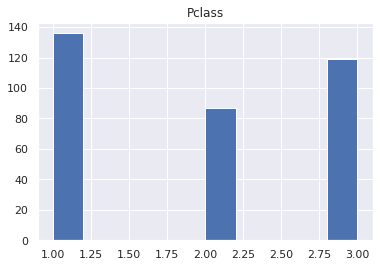

In [ ]:
df_2.hist()
plt.show()

In [ ]:
df_survived=df[df.Survived==1]
df_survived['Pclass'].value_counts()
#En el histograma vemos que los que más sobrevivieron pertenecían a la clase 1 mientras que los que menos a la clase 2

1    136
3    119
2     87
Name: Pclass, dtype: int64

# Feature Engineering

Here you can find some features that have been proposed for this dataset. Your task is to analyse them and provide some insights. 

Use pandas and visualisation to justify your conclusions

## Feature FamilySize 

Regarding SbSp and Parch, we can define a new feature, 'FamilySize' that is the combination of both.

In [ ]:
#El total de integrantes de la familia es la suma de padres, esposos, hermanos e hijos
df['FamilySize'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Alone,Salutation,Children,Female,AgeGroup,Deck,FarePerPerson,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,False,Mr,0,0,3.0,X,3.62500,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,False,Mrs,0,1,3.0,C,35.64165,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,True,Miss,0,1,3.0,X,7.92500,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,False,Mrs,0,1,3.0,C,26.55000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,True,Mr,0,0,3.0,X,8.05000,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,True,Others,0,0,3.0,X,13.00000,54.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,True,Miss,0,1,3.0,B,30.00000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,3,False,Miss,0,1,NaN,X,5.86250,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,0,True,Mr,0,0,3.0,C,30.00000,26.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


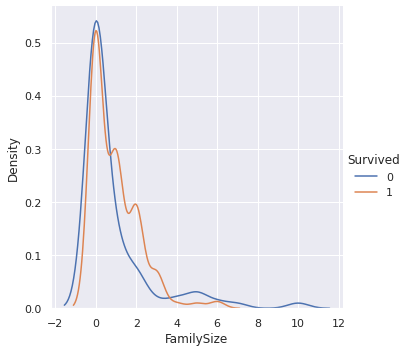

In [60]:
sns.FacetGrid(df, hue="Survived", size=5).map(sns.kdeplot, "FamilySize").add_legend()


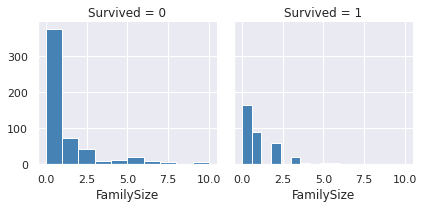

In [61]:
#efectivamente sobreviven los más solitarios
hist_FamSize = sns.FacetGrid(df, col='Survived')
hist_FamSize.map(plt.hist, "FamilySize", color="steelblue")

## Feature Alone

It seems many people who went alone survived. We can define a new feature 'Alone'

In [ ]:
df['Alone'] = (df.FamilySize == 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


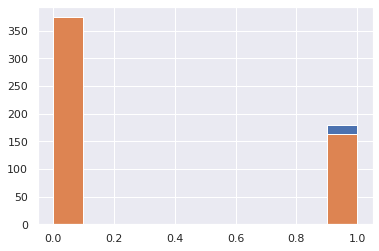

In [63]:
df_alone=df.groupby('Alone')['Survived']
df_alone.hist()
plt.show()

In [66]:
df_alone.mean()

Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64

## Feature Salutation

If we observe well in the name variable, there is a 'title' (Mr., Miss., Mrs.). We can add a feature wit this title.

In [ ]:
#Taken from http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df['Salutation'] = df['Name'].apply(name_extract)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr


We can list the different salutations.

In [ ]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
df.groupby(['Salutation']).size()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

There only 4 main salutations, so we combine the rest of salutations in 'Others'.

In [ ]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    else:
        if old_salutation == 'Mrs':
            return('Mrs')
        else:
            if old_salutation == 'Master':
                return('Master')
            else: 
                if old_salutation == 'Miss':
                    return('Miss')
                else:
                    return('Others')
df['Salutation'] = df['Salutation'].apply(group_salutation)
df.groupby(['Salutation']).size()

Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
dtype: int64

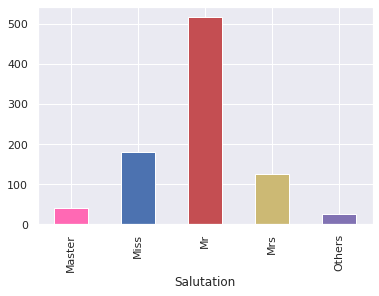

In [ ]:
# Distribution
colors_sex = ['#ff69b4', 'b', 'r', 'y', 'm', 'c']
df.groupby('Salutation').size().plot(kind='bar', color=colors_sex)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


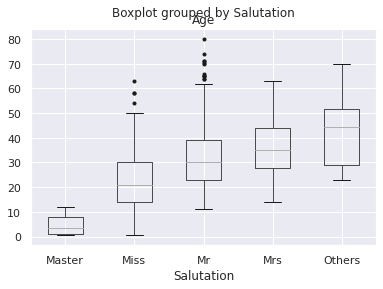

In [ ]:
df.boxplot(column='Age', by = 'Salutation', sym='k.')

## Features Children and Female

In [ ]:
# Specific features for Children and Female since there are more survivors
df['Children']   = df['Age'].map(lambda x: 1 if x < 6.0 else 0)
df['Female']     = df['Sex'].map(lambda x: 1 if x == "female" else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


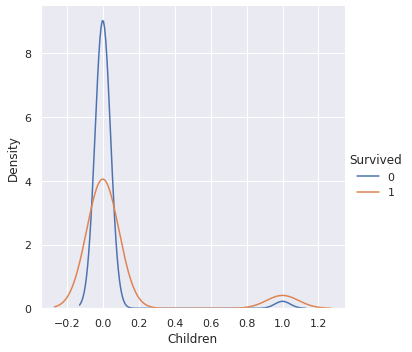

In [67]:
sns.FacetGrid(df, hue="Survived", size=5).map(sns.kdeplot, "Children").add_legend()

In [68]:
#Bastantes niños sobrevivieron
df.groupby('Children')['Survived'].mean()

Children
0    0.367178
1    0.704545
Name: Survived, dtype: float64

In [69]:
#Mujeres tambien
df.groupby('Female')['Survived'].mean()

Female
0    0.188908
1    0.742038
Name: Survived, dtype: float64

## Feature AgeGroup

In [71]:
# Group ages to simplify machine learning algorithms.  0: 0-5, 1: 6-10, 2: 11-15, 3: 16-59 and 4: 60-80
df['AgeGroup'] = np.nan
df.loc[(df.Age<6),'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age < 11),'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age < 16),'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age < 60),'AgeGroup'] = 3
df.loc[(df.Age>=60),'AgeGroup'] = 4

In [72]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Alone,Salutation,Children,Female,AgeGroup,Deck,FarePerPerson,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,False,Mr,0,0,3.0,X,3.62500,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,False,Mrs,0,1,3.0,C,35.64165,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,True,Miss,0,1,3.0,X,7.92500,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,False,Mrs,0,1,3.0,C,26.55000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,True,Mr,0,0,3.0,X,8.05000,105.0


In [73]:
#El grupo 2 es el que más sobrevive, de 11 a 16 años
df.groupby('AgeGroup')['Survived'].mean()

AgeGroup
0.0    0.704545
1.0    0.350000
2.0    0.578947
3.0    0.386777
4.0    0.269231
Name: Survived, dtype: float64

## Feature Deck
Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck.

In [76]:
def substrings_in_string(big_string, substrings):
    if type(big_string) == float:
        if np.isnan(big_string):
            return 'X'
    for substring in substrings:
        if substring in big_string:
            return substring[0::]
    print(big_string)
    return 'X'
 
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [77]:
df['Deck'].head(5)

0    X
1    C
2    X
3    C
4    X
Name: Deck, dtype: object

In [78]:
df.groupby('Deck')['Survived'].mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.757576
F    0.583333
G    0.500000
T    0.000000
X    0.299854
Name: Survived, dtype: float64

## Feature FarePerPerson

This feature is created from two previous features: Fare and FamilySize.

In [79]:
df['FarePerPerson']= df['Fare'] / (df['FamilySize'] + 1)

In [80]:
df['FarePerPerson']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerPerson, Length: 891, dtype: float64

In [55]:
#podemos observar la media de tasa por persona (20), la desviación (35) o el maximo de 512. Hay precios muy dispares. 
df['FarePerPerson'].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: FarePerPerson, dtype: float64

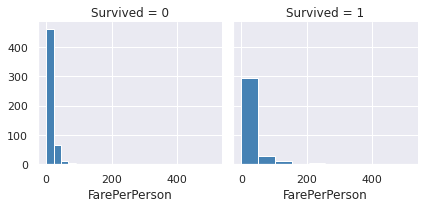

In [84]:
#Histograma de la tarifa por persona, en funcion de si sobreviven o no
d_aux = sns.FacetGrid(df, col='Survived')
d_aux.map(plt.hist, "FarePerPerson", color="steelblue")

## Feature AgeClass

Since age and class are both numbers we can just multiply them and get a new feature.


In [85]:
df['AgeClass']=df['Age']*df['Pclass']

In [86]:
df['AgeClass'].describe()

count    714.000000
mean      61.938151
std       34.379609
min        0.920000
25%       38.000000
50%       58.000000
75%       81.000000
max      222.000000
Name: AgeClass, dtype: float64

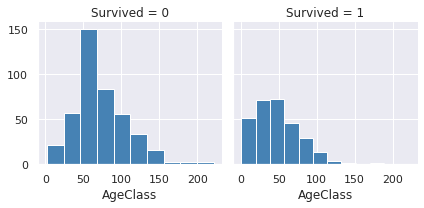

In [87]:
#Histograma con el grupo de edad
df_agesurvived = sns.FacetGrid(df, col='Survived')
df_agesurvived.map(plt.hist, "AgeClass", color="steelblue")

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

©  Carlos A. Iglesias, Universidad Politécnica de Madrid.